<a href="https://colab.research.google.com/github/carlosfab/meu-portfolio/blob/master/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [0]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [0]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## Análise Inicial dos Dados

Esta etapa tem como objetivo permitir o entendimento de como os dados estão estruturados.

O conjunto de dados contém 303 linhas e 14 colunas. Como você pode ver abaixo, os dados podem ser agrupados por vários incluindo sexo e idade.

In [0]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Abaixo podemos identificar quais os tipos de variáveis presentes no dataset

In [0]:
# ver os tipos das variáveis 
display(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

Abaixo a o método describe nos mostra alguns dados estatísticos como 
como média, quartil e mediana.

Podemos ver que a média de idade é de 54 anos e conforma abaixo vemos a distribuição por sexo.

In [0]:
#Estatística do dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


###Quantidade por sexo

Lembrando que 
0 representa sexo feminino
1 representa sexo masculino



In [0]:
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

### Gráfico de barras 

No gráfico abaixo iremos mostrar o comparativo entre sexos.

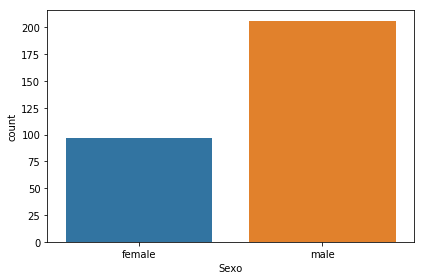

In [0]:
# plotar o gráfico de barras com a entrada média de passageiros
import seaborn as sns

fig, ax = plt.subplots()

sns.countplot('sex', data=df, ax=ax)

ax.set_xlabel("Sexo")
ax.set_xticklabels(['female', 'male'])

plt.tight_layout()

###Gráfico de dispersão para as variáveis idade e colesterol sérico 

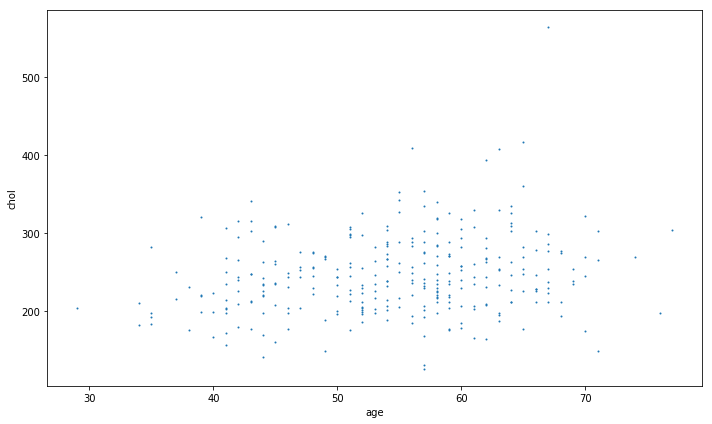

In [0]:
# plotar o scatterplot
fig, ax = plt.subplots(figsize=(10,6))

df.plot.scatter(x='age', y='chol', ax=ax, s=1)


plt.tight_layout()

### Histograma para o colesterol sérico

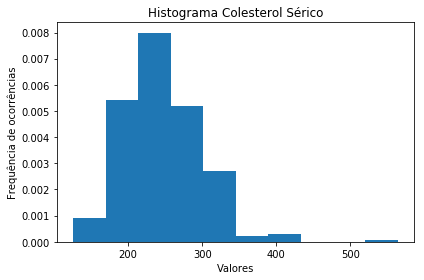

In [0]:
# plotar o histograma para colesterol sérico
fig, ax = plt.subplots()

df["chol"].plot(kind="hist", ax=ax, density=True)
ax.set_title("Histograma Colesterol Sérico")
ax.set_ylabel("Frequência de ocorrências")
ax.set_xlabel("Valores")

plt.tight_layout()

### Gráfico de pizza para resultado do eletrocardiografia de repouso

Lembrando que :

*   0: normal
*  1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
*  2: ipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)





In [0]:
# extrair as ocorrências para um dicionário
restecg = dict(df.restecg.value_counts())

# preparar dados para o pie chart
labels = restecg.keys()
sizes = restecg.values()
explode = (0.1, 0, 0)

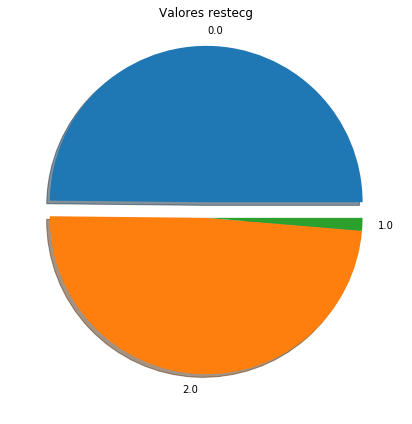

In [0]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode=explode, shadow=True)
ax.set_title("Valores restecg")

plt.tight_layout()

In [0]:
import seaborn as sns 

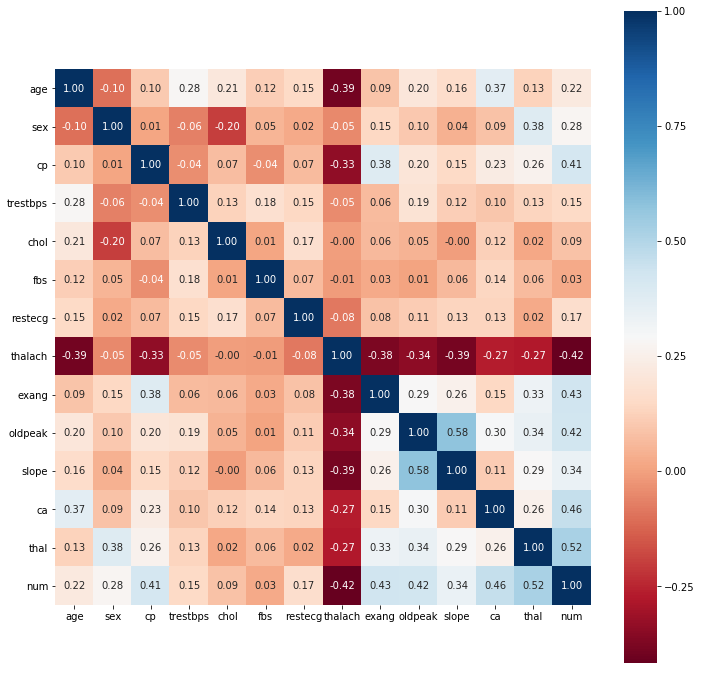

In [0]:
fig, ax = plt.subplots(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white',
            annot=True)

plt.show()  

In [0]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [0]:
# ver os valores faltantes das colunas
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

###Analisando dados do Brasil

Após a análise dos dados da **Cleveland Clinic Foundation**, iremos avaliar alguns dados referentes ao **Brasil**. Como podemos ver nos dados descritos abaixo o número de mortes causadas por doenças cardiológicas tem aumentando ao longo dos anos.

In [0]:
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


In [0]:
# ver os tipos das variáveis 
display(df_brasil.dtypes)

ano                        int64
mortes_doencas_cardio    float64
dtype: object

### Gráfico de linhas 

Abaixo iremos plotar gráfico de linhas para auxiliar em nossa visualização do aumentos de mortes por doenças cardiovasculares.

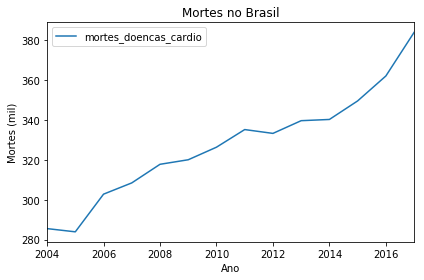

In [0]:
fig, ax = plt.subplots()
df_brasil.plot('ano', 'mortes_doencas_cardio', ax=ax)
ax.set_title("Mortes no Brasil")
ax.set_xlabel('Ano')
ax.set_ylabel("Mortes (mil)")
plt.tight_layout()

##Machine Learning  - Árvore de decisão 

Depois de realizarmos as análises acima, iremos demonstrar como trabalhar com árvore de decisão que é um algoritmo de aprendizado supervisionado para Machine Learning. Conforme descrito no início do notebook , os dados foram obtidos através
[Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0")


Iremos utilizar o algoritmo de árvore de decisão (DecisionTree) a partir do sklearn.tree. 
A scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina.
Iremos importar a classe DecisionTreeClassifier a partir do sklearn.tree, assim como a métrica que será usadas para avaliar o desempenho do modelo de Machine Learning.

In [0]:
# importar scikit-learn para criar o modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
# determinar X e y
X = df.drop('num', axis=1)
y = df['num']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# criar e treinar um modelo de Regressão Linear
dt_model = DecisionTreeClassifier(max_depth=6, criterion="entropy")
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Vamos testar o desempenho do modelo em cima do nosso conjunto de testes. Para isso, vou colocar a variável X_test como argumento do ml_model.predict() e guardar as previsões para verificar o desempenho do modelo.

In [0]:
# previsões e probabilidades em cima do dataset de teste
y_pred = dt_model.predict(X_test)

# ver performance do algoritmo
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_pred))


Accuracy Score:
0.6842105263157895


É possível também visualizar como ficou a nossa árvore, criando um dot e desenhando ele usando as bibliotecas abaixo.

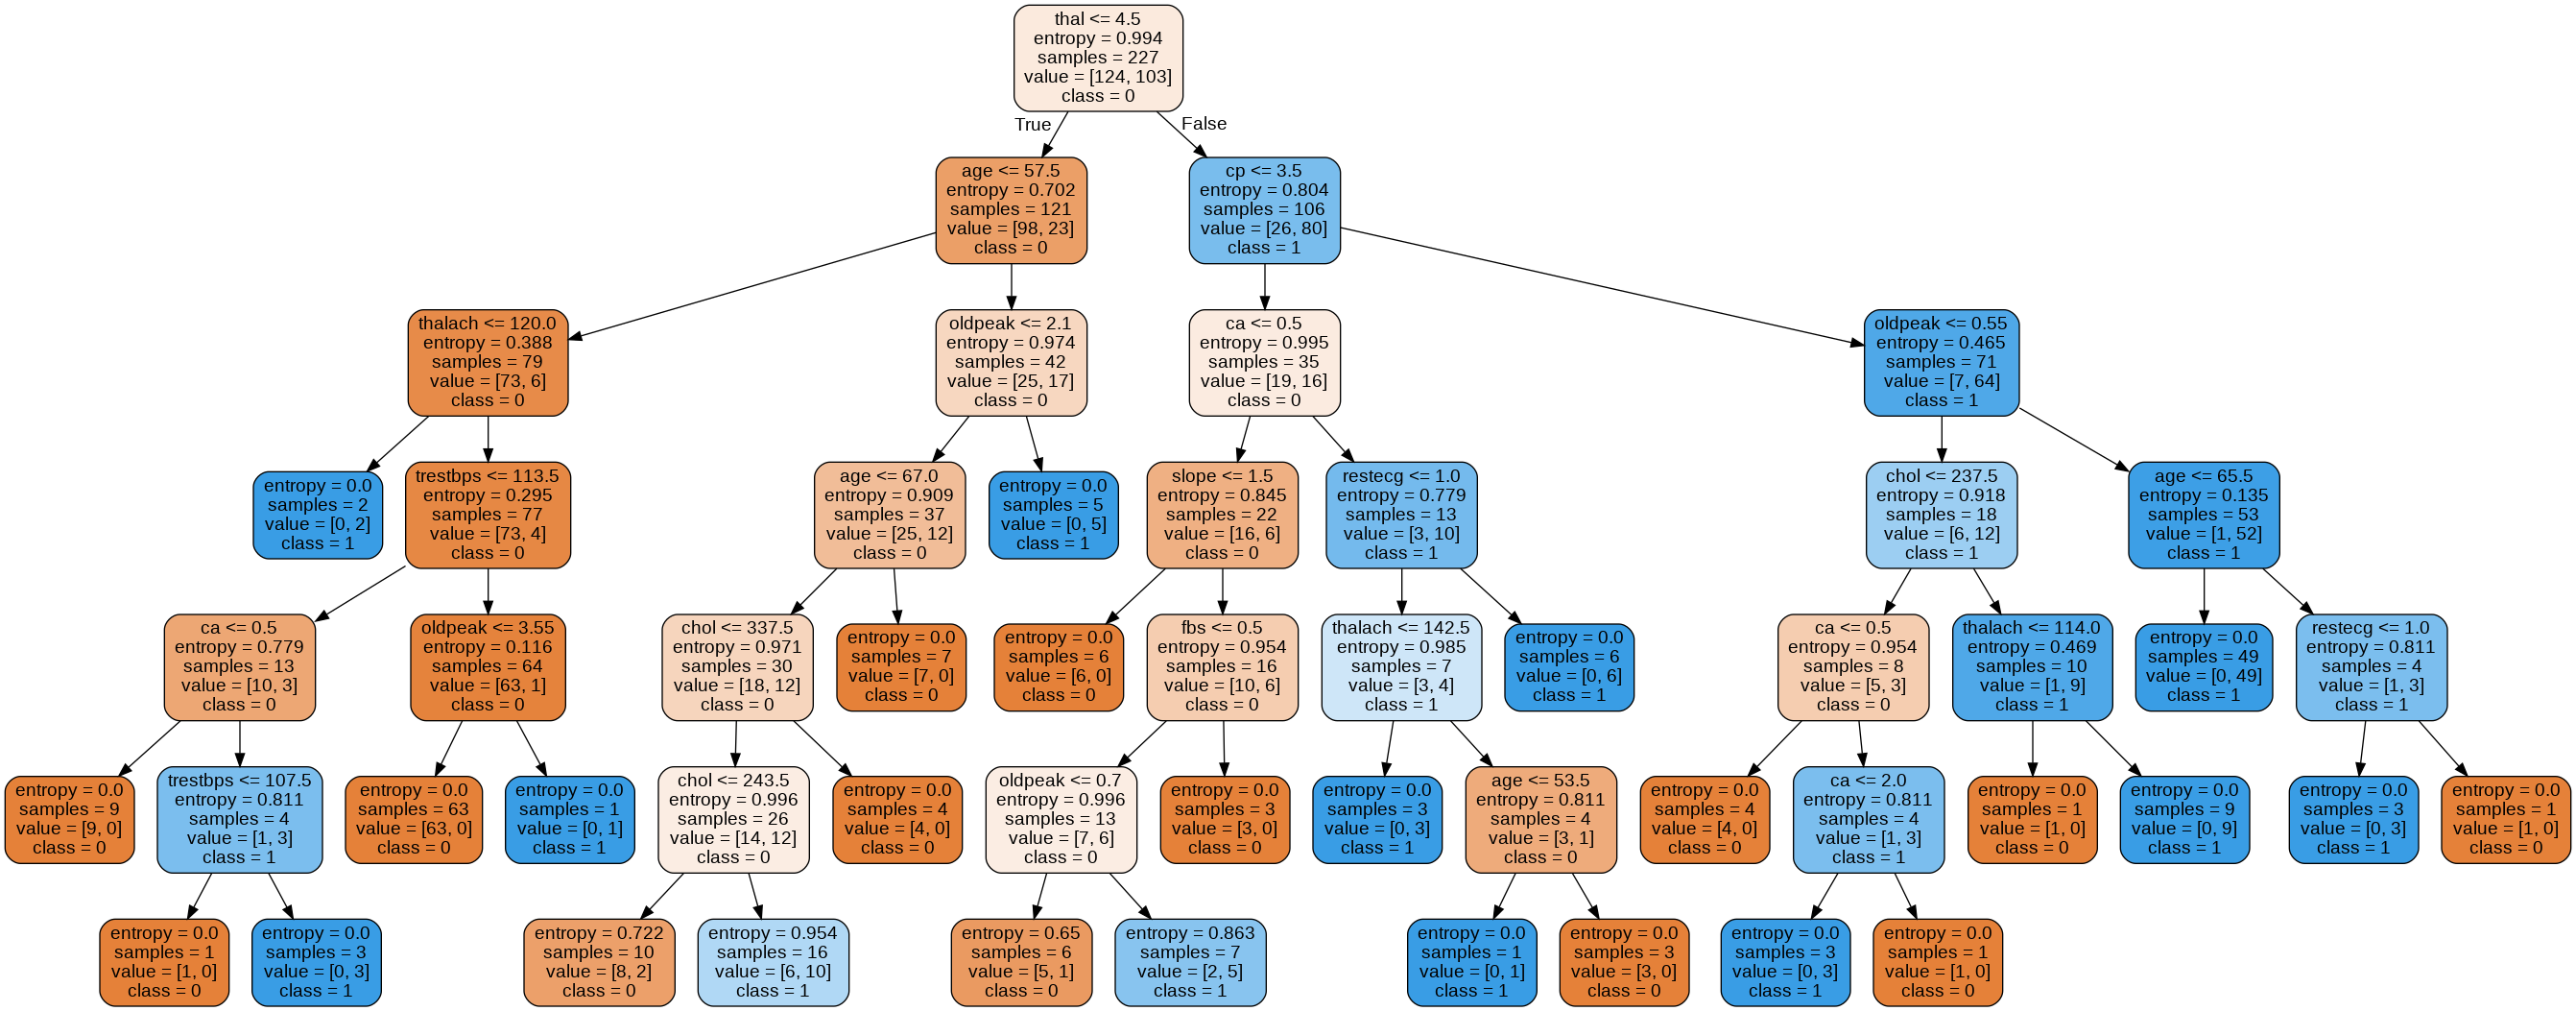

In [0]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(dt_model, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())